In [1]:
# importing all the required libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import skimage.io as io
from skimage.transform import rotate, AffineTransform, warp,resize
from skimage.util import random_noise
from skimage.filters import gaussian
import matplotlib.pyplot as plt
% matplotlib inline

(432, 286, 3)


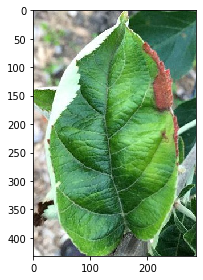

In [2]:
# reading the image using its path
image = io.imread('35.jpg')

# shape of the image
print(image.shape)

# displaying the image
io.imshow(image)

In [4]:
image_resized = resize(image, (224,224),anti_aliasing=True)

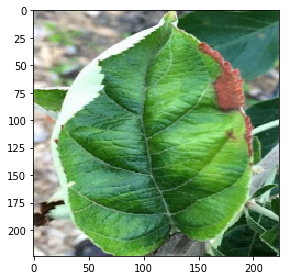

In [5]:
io.imshow(image_resized)

Rotated Image


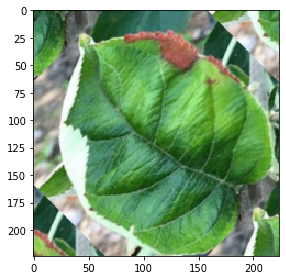

In [7]:
print('Rotated Image')
#rotating the image by 45 degrees
rotated = rotate(image_resized, angle=45, mode = 'wrap')
#plot the rotated image
io.imshow(rotated)

Rotated Image


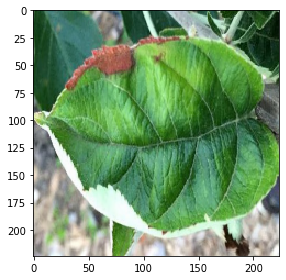

In [8]:
print('Rotated Image')
#rotating the image by 45 degrees
rotated = rotate(image_resized, angle=90, mode = 'wrap')
#plot the rotated image
io.imshow(rotated)

Rotated Image


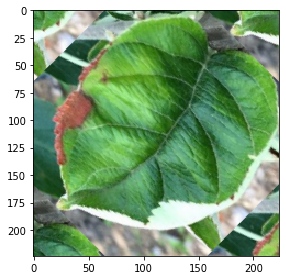

In [10]:
print('Rotated Image')
#rotating the image by 45 degrees
rotated = rotate(image_resized, angle=135, mode = 'wrap')
#plot the rotated image
io.imshow(rotated)

Text(0.5, 1.0, 'Wrap Shift')

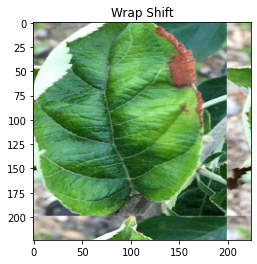

In [11]:
#apply shift operation
transform = AffineTransform(translation=(25,25))
wrapShift = warp(image_resized,transform,mode='wrap')
plt.imshow(wrapShift)
plt.title('Wrap Shift')

Text(0.5, 1.0, 'Left to Right Flipped')

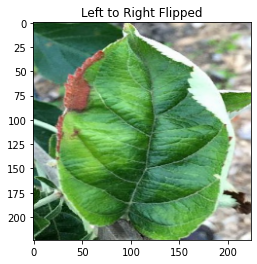

In [12]:
#flip image left-to-right
flipLR = np.fliplr(image_resized)

plt.imshow(flipLR)
plt.title('Left to Right Flipped')

Text(0.5, 1.0, 'Up Down Flipped')

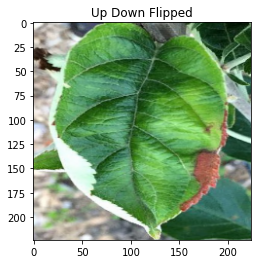

In [14]:
#flip image up-to-down
flipUD = np.flipud(image_resized)

plt.imshow(flipUD)
plt.title('Up Down Flipped')

Text(0.5, 1.0, 'Random Noise')

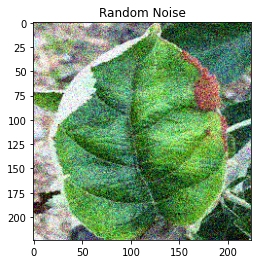

In [16]:
#standard deviation for noise to be added in the image
sigma=0.155
#add random noise to the image
noisyRandom = random_noise(image_resized,var=sigma**2)

plt.imshow(noisyRandom)
plt.title('Random Noise')

Text(0.5, 1.0, 'Blurred Image')

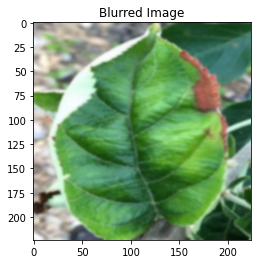

In [17]:

#blur the image
blurred = gaussian(image_resized,sigma=1,multichannel=True)

plt.imshow(blurred)
plt.title('Blurred Image')

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#!unrar x "/content/gdrive/MyDrive/Deep Learning/PlantDoc_cropped.rar"

import zipfile

#zip_ref = zipfile.ZipFile("/content/gdrive/MyDrive/Deep Learning/archive.zip", 'r')
zip_ref = zipfile.ZipFile("/content/gdrive/MyDrive/Deep Learning/Merged_PlantDoc2.zip",'r')
zip_ref.extractall()
zip_ref.close()

In [4]:
import os 
import torch  
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

import torchvision

%matplotlib inline

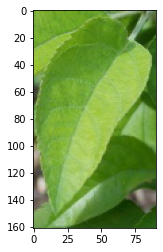

In [5]:
# you can use any image of your choice
img = Image.open('/content/Merged_PlantDoc2/Apple leaf/0.jpg')
plt.imshow(img)

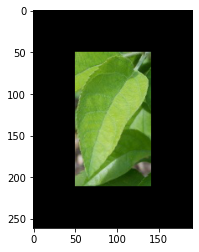

In [7]:
img = Image.open('/content/Merged_PlantDoc2/Apple leaf/0.jpg')

pad = torchvision.transforms.Pad(50, fill=0, padding_mode='constant')
img = pad(img)
plt.imshow(img)

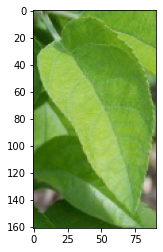

In [8]:
img = Image.open('/content/Merged_PlantDoc2/Apple leaf/0.jpg')

horizontal_flip = torchvision.transforms.RandomHorizontalFlip(p=1)
img = horizontal_flip(img)
plt.imshow(img)

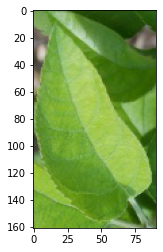

In [9]:
img = Image.open('/content/Merged_PlantDoc2/Apple leaf/0.jpg')
vertical_flip = torchvision.transforms.RandomVerticalFlip(p=1)
img = vertical_flip(img)
plt.imshow(img)

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:689: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


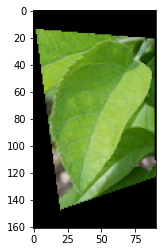

In [10]:
img = Image.open('/content/Merged_PlantDoc2/Apple leaf/0.jpg')
random_persp = torchvision.transforms.RandomPerspective(distortion_scale=0.5, p=1, interpolation=3, fill=0)
img = random_persp(img)
plt.imshow(img)

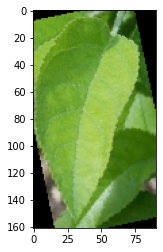

In [11]:
img = Image.open('/content/Merged_PlantDoc2/Apple leaf/0.jpg')
random_rotation = torchvision.transforms.RandomRotation(degrees = 45)
img = random_rotation(img)
plt.imshow(img)

(161, 91, 3)
Rotated Image


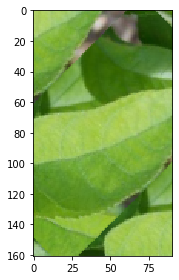

In [18]:
# reading the image using its path
image = io.imread('/content/Merged_PlantDoc2/Apple leaf/0.jpg')

# shape of the image
print(image.shape)

# displaying the image
io.imshow(image)

print('Rotated Image')
#rotating the image by 45 degrees
rotated = rotate(image, angle=135, mode = 'wrap')
#plot the rotated image
io.imshow(rotated)

In [5]:
dir = "Merged_PlantDoc2/"

In [6]:
from skimage import img_as_ubyte

In [7]:
#horizontal flip
def hf_img(img_path,img):
    #flip image left-to-right
    image = io.imread(img_path+img)
    flipLR = np.fliplr(image)   
    io.imsave(img_path+img[:-4]+"_hf.jpg",flipLR)

#vertical flip
def vf_img(img_path,img):
    #flip image left-to-right
    image = io.imread(img_path+img)
    flipUD = np.flipud(image)
    io.imsave(img_path+img[:-4]+"_vf.jpg",flipUD)


#vertical flip
def rotate_img(img_path,img,angle_):
    #flip image left-to-right
    image = io.imread(img_path+img)
    rotated = rotate(image, angle=angle_, mode = 'wrap')
    rotated = img_as_ubyte(rotated)
    io.imsave(img_path+img[:-4]+"_"+str(angle_)+"_r.jpg",rotated)
   


In [8]:
#!rm -rf "Merged_PlantDoc2"

In [9]:
folder = "Corn Gray leaf spot/"

list_img = os.listdir(dir + folder)
len(list_img)

78

In [10]:
for img in list_img:
    print(img)
    hf_img(dir+folder,img)
    vf_img(dir+folder,img)
    rotate_img(dir+folder,img,45)
    rotate_img(dir+folder,img,90)
    rotate_img(dir+folder,img,135)
    rotate_img(dir+folder,img,180)
    rotate_img(dir+folder,img,225)
    rotate_img(dir+folder,img,270)
    rotate_img(dir+folder,img,315)

38.jpg
25.jpg
56.jpg
29.jpg
35.jpg
0 (2).jpg
54.jpg
4.jpg
69.jpg
15.jpg
34.jpg
5.jpg
45.jpg
59.jpg
65.jpg
16.jpg
67.jpg
44.jpg
43.jpg
27.jpg
68.jpg
3 (2).jpg
48.jpg
23.jpg
19.jpg
22.jpg
51.jpg
21.jpg
17.jpg
37.jpg
18.jpg
2 (2).jpg
20.jpg
32.jpg
3.jpg
70.jpg
52.jpg
50.jpg
0.jpg
58.jpg
6.jpg
28.jpg
8.jpg
7.jpg
62.jpg
49.jpg
9.jpg
31.jpg
73.jpg
72.jpg
24.jpg
71.jpg
63.jpg
33.jpg
55.jpg
64.jpg
14.jpg
66.jpg
2.jpg
47.jpg
41.jpg
36.jpg
12.jpg
11.jpg
46.jpg
10.jpg
42.jpg
39.jpg
57.jpg
40.jpg
30.jpg
61.jpg
1 (2).jpg
26.jpg
60.jpg
13.jpg
1.jpg
53.jpg


In [11]:
list_img = os.listdir(dir + folder)
len(list_img)

780

In [12]:
folder = "Tomato leaf bacterial spot/"

list_img = os.listdir(dir + folder)
len(list_img)

280

In [13]:
for img in list_img:
    print(img)
    hf_img(dir+folder,img)
    vf_img(dir+folder,img)

204.jpg
224.jpg
79.jpg
221.jpg
92.jpg
134.jpg
38.jpg
109.jpg
173.jpg
25.jpg
108.jpg
56.jpg
229.jpg
179.jpg
86.jpg
29.jpg
210.jpg
213.jpg
35.jpg
180.jpg
127.jpg
98.jpg
201.jpg
264.jpg
0 (2).jpg
54.jpg
93.jpg
4.jpg
69.jpg
12 (2).jpg
207.jpg
15.jpg
34.jpg
5.jpg
190.jpg
83.jpg
45.jpg
176.jpg
59.jpg
106.jpg
100.jpg
164.jpg
137.jpg
143.jpg
261.jpg
13 (2).jpg
121.jpg
102.jpg
65.jpg
89.jpg
74.jpg
16.jpg
67.jpg
194.jpg
44.jpg
43.jpg
157.jpg
27.jpg
68.jpg
110.jpg
3 (2).jpg
48.jpg
251.jpg
23.jpg
177.jpg
233.jpg
254.jpg
217.jpg
117.jpg
19.jpg
256.jpg
125.jpg
220.jpg
189.jpg
235.jpg
178.jpg
22.jpg
259.jpg
51.jpg
236.jpg
226.jpg
126.jpg
5 (2).jpg
243.jpg
21.jpg
241.jpg
105.jpg
115.jpg
232.jpg
186.jpg
10 (2).jpg
175.jpg
156.jpg
230.jpg
85.jpg
6 (2).jpg
165.jpg
260.jpg
146.jpg
17.jpg
37.jpg
18.jpg
2 (2).jpg
11 (2).jpg
263.jpg
219.jpg
130.jpg
225.jpg
20.jpg
32.jpg
253.jpg
244.jpg
123.jpg
3.jpg
70.jpg
248.jpg
161.jpg
187.jpg
196.jpg
205.jpg
52.jpg
170.jpg
50.jpg
199.jpg
237.jpg
238.jpg
147.jpg
198.jpg
0

In [14]:
folder = "Tomato leaf bacterial spot/"

list_img = os.listdir(dir + folder)
len(list_img)

840

In [15]:
folder = "Tomato leaf late blight/"

list_img = os.listdir(dir + folder)
len(list_img)

220

In [16]:
for img in list_img:
    print(img)
    hf_img(dir+folder,img)
    vf_img(dir+folder,img)
    rotate_img(dir+folder,img,180)

204.jpg
79.jpg
92.jpg
134.jpg
38.jpg
109.jpg
173.jpg
25.jpg
108.jpg
56.jpg
179.jpg
86.jpg
29.jpg
35.jpg
180.jpg
127.jpg
98.jpg
201.jpg
0 (2).jpg
54.jpg
93.jpg
4.jpg
69.jpg
12 (2).jpg
15.jpg
34.jpg
5.jpg
190.jpg
83.jpg
45.jpg
176.jpg
59.jpg
106.jpg
100.jpg
164.jpg
137.jpg
143.jpg
13 (2).jpg
121.jpg
102.jpg
65.jpg
89.jpg
74.jpg
16.jpg
67.jpg
194.jpg
44.jpg
43.jpg
157.jpg
27.jpg
68.jpg
110.jpg
3 (2).jpg
48.jpg
23.jpg
177.jpg
117.jpg
19.jpg
125.jpg
189.jpg
178.jpg
22.jpg
51.jpg
126.jpg
5 (2).jpg
21.jpg
105.jpg
115.jpg
186.jpg
10 (2).jpg
175.jpg
156.jpg
85.jpg
6 (2).jpg
165.jpg
146.jpg
17.jpg
37.jpg
18.jpg
2 (2).jpg
11 (2).jpg
130.jpg
20.jpg
32.jpg
123.jpg
3.jpg
70.jpg
161.jpg
187.jpg
196.jpg
205.jpg
52.jpg
170.jpg
50.jpg
199.jpg
147.jpg
198.jpg
0.jpg
58.jpg
6.jpg
158.jpg
133.jpg
129.jpg
95.jpg
141.jpg
153.jpg
184.jpg
111.jpg
152.jpg
28.jpg
8.jpg
77.jpg
78.jpg
139.jpg
7.jpg
99.jpg
116.jpg
191.jpg
202.jpg
138.jpg
62.jpg
49.jpg
9.jpg
132.jpg
140.jpg
168.jpg
188.jpg
84.jpg
155.jpg
200.jpg
154.

In [17]:
folder = "Tomato leaf late blight/"

list_img = os.listdir(dir + folder)
len(list_img)

880

In [18]:
folder = "grape leaf/"

list_img = os.listdir(dir + folder)
len(list_img)

220

In [19]:
for img in list_img:
    print(img)
    hf_img(dir+folder,img)
    vf_img(dir+folder,img)
    rotate_img(dir+folder,img,180)

204.jpg
79.jpg
92.jpg
134.jpg
38.jpg
109.jpg
173.jpg
25.jpg
108.jpg
56.jpg
179.jpg
86.jpg
29.jpg
35.jpg
180.jpg
127.jpg
98.jpg
201.jpg
0 (2).jpg
54.jpg
93.jpg
4.jpg
69.jpg
12 (2).jpg
15.jpg
34.jpg
5.jpg
190.jpg
83.jpg
45.jpg
176.jpg
59.jpg
106.jpg
100.jpg
164.jpg
137.jpg
143.jpg
13 (2).jpg
121.jpg
102.jpg
65.jpg
89.jpg
74.jpg
16.jpg
67.jpg
194.jpg
44.jpg
43.jpg
157.jpg
27.jpg
68.jpg
110.jpg
3 (2).jpg
48.jpg
23.jpg
177.jpg
117.jpg
19.jpg
125.jpg
189.jpg
178.jpg
22.jpg
51.jpg
126.jpg
5 (2).jpg
21.jpg
105.jpg
115.jpg
186.jpg
10 (2).jpg
175.jpg
156.jpg
85.jpg
6 (2).jpg
165.jpg
146.jpg
17.jpg
37.jpg
18.jpg
2 (2).jpg
11 (2).jpg
130.jpg
20.jpg
32.jpg
123.jpg
3.jpg
70.jpg
161.jpg
187.jpg
196.jpg
52.jpg
170.jpg
50.jpg
199.jpg
14 (2).jpg
147.jpg
198.jpg
0.jpg
58.jpg
6.jpg
158.jpg
133.jpg
129.jpg
95.jpg
141.jpg
153.jpg
184.jpg
111.jpg
152.jpg
28.jpg
8.jpg
77.jpg
78.jpg
139.jpg
7.jpg
99.jpg
116.jpg
191.jpg
202.jpg
138.jpg
62.jpg
49.jpg
9.jpg
132.jpg
140.jpg
168.jpg
188.jpg
84.jpg
155.jpg
200.jpg
1

In [20]:
folder = "grape leaf/"

list_img = os.listdir(dir + folder)
len(list_img)

880

In [21]:
folder = "Soyabean leaf/"

list_img = os.listdir(dir + folder)
len(list_img)

266

In [22]:
for img in list_img:
    print(img)
    hf_img(dir+folder,img)
    vf_img(dir+folder,img)

204.jpg
224.jpg
79.jpg
221.jpg
92.jpg
134.jpg
38.jpg
109.jpg
173.jpg
25.jpg
108.jpg
56.jpg
229.jpg
179.jpg
86.jpg
29.jpg
210.jpg
213.jpg
35.jpg
180.jpg
127.jpg
98.jpg
201.jpg
0 (2).jpg
54.jpg
93.jpg
4.jpg
69.jpg
12 (2).jpg
207.jpg
15.jpg
34.jpg
5.jpg
190.jpg
83.jpg
45.jpg
176.jpg
59.jpg
106.jpg
100.jpg
164.jpg
137.jpg
143.jpg
13 (2).jpg
121.jpg
102.jpg
65.jpg
89.jpg
74.jpg
16.jpg
67.jpg
194.jpg
44.jpg
43.jpg
157.jpg
27.jpg
68.jpg
110.jpg
3 (2).jpg
48.jpg
23.jpg
177.jpg
233.jpg
217.jpg
117.jpg
19.jpg
125.jpg
220.jpg
189.jpg
235.jpg
178.jpg
22.jpg
51.jpg
236.jpg
226.jpg
126.jpg
5 (2).jpg
243.jpg
21.jpg
241.jpg
105.jpg
115.jpg
232.jpg
186.jpg
10 (2).jpg
175.jpg
156.jpg
230.jpg
85.jpg
6 (2).jpg
165.jpg
146.jpg
17.jpg
37.jpg
18.jpg
2 (2).jpg
11 (2).jpg
219.jpg
130.jpg
225.jpg
20.jpg
32.jpg
244.jpg
123.jpg
3.jpg
70.jpg
161.jpg
187.jpg
196.jpg
205.jpg
52.jpg
170.jpg
50.jpg
199.jpg
14 (2).jpg
237.jpg
238.jpg
147.jpg
19 (2).jpg
198.jpg
0.jpg
58.jpg
6.jpg
158.jpg
133.jpg
129.jpg
95.jpg
15 (2).jp

In [23]:
folder = "Soyabean leaf/"

list_img = os.listdir(dir + folder)
len(list_img)

798

In [24]:
folder = "Bell_pepper leaf spot/"

list_img = os.listdir(dir + folder)
len(list_img)

263

In [25]:
for img in list_img:
    print(img)
    hf_img(dir+folder,img)
    vf_img(dir+folder,img)

204.jpg
224.jpg
79.jpg
221.jpg
92.jpg
134.jpg
38.jpg
109.jpg
173.jpg
25.jpg
108.jpg
56.jpg
229.jpg
179.jpg
86.jpg
29.jpg
210.jpg
213.jpg
35.jpg
180.jpg
127.jpg
98.jpg
201.jpg
0 (2).jpg
54.jpg
93.jpg
4.jpg
69.jpg
12 (2).jpg
207.jpg
15.jpg
34.jpg
5.jpg
190.jpg
83.jpg
45.jpg
176.jpg
59.jpg
106.jpg
100.jpg
164.jpg
137.jpg
143.jpg
13 (2).jpg
121.jpg
102.jpg
65.jpg
89.jpg
74.jpg
16.jpg
67.jpg
194.jpg
44.jpg
43.jpg
157.jpg
27.jpg
68.jpg
110.jpg
3 (2).jpg
48.jpg
23.jpg
177.jpg
233.jpg
217.jpg
117.jpg
19.jpg
125.jpg
220.jpg
189.jpg
235.jpg
178.jpg
22.jpg
51.jpg
236.jpg
226.jpg
126.jpg
5 (2).jpg
243.jpg
21.jpg
241.jpg
105.jpg
115.jpg
232.jpg
186.jpg
10 (2).jpg
175.jpg
156.jpg
230.jpg
85.jpg
6 (2).jpg
165.jpg
146.jpg
17.jpg
37.jpg
18.jpg
2 (2).jpg
11 (2).jpg
219.jpg
130.jpg
225.jpg
20.jpg
32.jpg
244.jpg
123.jpg
3.jpg
70.jpg
161.jpg
187.jpg
196.jpg
205.jpg
52.jpg
170.jpg
50.jpg
199.jpg
14 (2).jpg
237.jpg
238.jpg
147.jpg
198.jpg
0.jpg
58.jpg
6.jpg
158.jpg
133.jpg
129.jpg
95.jpg
141.jpg
153.jpg
184.

In [26]:
folder = "Bell_pepper leaf spot/"

list_img = os.listdir(dir + folder)
len(list_img)

789

In [27]:
folder = "Apple rust leaf/"

list_img = os.listdir(dir + folder)
len(list_img)

178

In [28]:
for img in list_img:
    print(img)
    hf_img(dir+folder,img)
    vf_img(dir+folder,img)
    rotate_img(dir+folder,img,45)
    rotate_img(dir+folder,img,180)

79.jpg
92.jpg
134.jpg
38.jpg
109.jpg
25.jpg
108.jpg
56.jpg
86.jpg
29.jpg
35.jpg
127.jpg
98.jpg
0 (2).jpg
54.jpg
93.jpg
4.jpg
69.jpg
15.jpg
34.jpg
5.jpg
83.jpg
45.jpg
59.jpg
106.jpg
100.jpg
164.jpg
137.jpg
143.jpg
121.jpg
102.jpg
65.jpg
89.jpg
74.jpg
16.jpg
67.jpg
44.jpg
43.jpg
157.jpg
27.jpg
68.jpg
110.jpg
3 (2).jpg
48.jpg
23.jpg
117.jpg
19.jpg
125.jpg
22.jpg
51.jpg
126.jpg
5 (2).jpg
21.jpg
105.jpg
115.jpg
10 (2).jpg
156.jpg
85.jpg
6 (2).jpg
165.jpg
146.jpg
17.jpg
37.jpg
18.jpg
2 (2).jpg
130.jpg
20.jpg
32.jpg
123.jpg
3.jpg
70.jpg
161.jpg
52.jpg
50.jpg
147.jpg
0.jpg
58.jpg
6.jpg
158.jpg
133.jpg
129.jpg
95.jpg
141.jpg
153.jpg
111.jpg
152.jpg
28.jpg
8.jpg
77.jpg
78.jpg
139.jpg
7.jpg
99.jpg
116.jpg
138.jpg
62.jpg
49.jpg
9.jpg
132.jpg
140.jpg
84.jpg
155.jpg
154.jpg
122.jpg
76.jpg
80.jpg
150.jpg
31.jpg
73.jpg
120.jpg
101.jpg
135.jpg
91.jpg
72.jpg
88.jpg
24.jpg
71.jpg
94.jpg
63.jpg
33.jpg
97.jpg
104.jpg
55.jpg
90.jpg
159.jpg
124.jpg
64.jpg
144.jpg
145.jpg
14.jpg
66.jpg
114.jpg
131.jpg
87.jpg


In [29]:
folder = "Apple rust leaf/"

list_img = os.listdir(dir + folder)
len(list_img)

890

In [30]:
folder = "Tomato Septoria leaf spot/"

list_img = os.listdir(dir + folder)
len(list_img)

433

In [31]:
for img in list_img:
    print(img)
    vf_img(dir+folder,img)

325.jpg
324.jpg
204.jpg
224.jpg
273.jpg
363.jpg
270.jpg
79.jpg
361.jpg
221.jpg
339.jpg
92.jpg
134.jpg
377.jpg
38.jpg
109.jpg
341.jpg
386.jpg
173.jpg
25.jpg
108.jpg
56.jpg
229.jpg
179.jpg
86.jpg
29.jpg
210.jpg
277.jpg
408.jpg
285.jpg
344.jpg
213.jpg
35.jpg
180.jpg
127.jpg
98.jpg
201.jpg
404.jpg
264.jpg
0 (2).jpg
54.jpg
93.jpg
4.jpg
69.jpg
352.jpg
12 (2).jpg
207.jpg
15.jpg
332.jpg
278.jpg
34.jpg
5.jpg
190.jpg
286.jpg
83.jpg
45.jpg
283.jpg
176.jpg
330.jpg
59.jpg
106.jpg
100.jpg
164.jpg
137.jpg
143.jpg
338.jpg
403.jpg
261.jpg
288.jpg
13 (2).jpg
390.jpg
387.jpg
121.jpg
102.jpg
367.jpg
65.jpg
320.jpg
349.jpg
267.jpg
89.jpg
74.jpg
16.jpg
405.jpg
67.jpg
282.jpg
194.jpg
44.jpg
335.jpg
391.jpg
43.jpg
157.jpg
295.jpg
280.jpg
368.jpg
27.jpg
68.jpg
110.jpg
3 (2).jpg
48.jpg
268.jpg
251.jpg
402.jpg
23.jpg
298.jpg
399.jpg
396.jpg
177.jpg
233.jpg
334.jpg
254.jpg
217.jpg
117.jpg
19.jpg
256.jpg
294.jpg
125.jpg
220.jpg
189.jpg
235.jpg
178.jpg
22.jpg
259.jpg
51.jpg
236.jpg
226.jpg
126.jpg
297.jpg
5 (2).jpg

In [32]:
folder = "Tomato mold leaf/"

list_img = os.listdir(dir + folder)
len(list_img)

293

In [33]:
for img in list_img:
    print(img)
    hf_img(dir+folder,img)
    vf_img(dir+folder,img)

204.jpg
224.jpg
273.jpg
270.jpg
79.jpg
221.jpg
92.jpg
134.jpg
38.jpg
109.jpg
173.jpg
25.jpg
108.jpg
56.jpg
229.jpg
179.jpg
86.jpg
29.jpg
210.jpg
213.jpg
35.jpg
180.jpg
127.jpg
98.jpg
201.jpg
264.jpg
0 (2).jpg
54.jpg
93.jpg
4.jpg
69.jpg
12 (2).jpg
207.jpg
15.jpg
34.jpg
5.jpg
190.jpg
83.jpg
45.jpg
176.jpg
59.jpg
106.jpg
100.jpg
164.jpg
137.jpg
143.jpg
261.jpg
13 (2).jpg
121.jpg
102.jpg
65.jpg
267.jpg
89.jpg
74.jpg
16.jpg
67.jpg
194.jpg
44.jpg
43.jpg
157.jpg
27.jpg
68.jpg
110.jpg
3 (2).jpg
48.jpg
268.jpg
251.jpg
23.jpg
177.jpg
233.jpg
254.jpg
217.jpg
117.jpg
19.jpg
256.jpg
125.jpg
220.jpg
189.jpg
235.jpg
178.jpg
22.jpg
259.jpg
51.jpg
236.jpg
226.jpg
126.jpg
5 (2).jpg
243.jpg
21.jpg
241.jpg
105.jpg
115.jpg
232.jpg
186.jpg
10 (2).jpg
175.jpg
156.jpg
230.jpg
85.jpg
6 (2).jpg
165.jpg
260.jpg
146.jpg
17.jpg
37.jpg
18.jpg
2 (2).jpg
11 (2).jpg
263.jpg
219.jpg
130.jpg
225.jpg
20.jpg
32.jpg
253.jpg
244.jpg
123.jpg
3.jpg
70.jpg
248.jpg
161.jpg
187.jpg
196.jpg
205.jpg
52.jpg
170.jpg
50.jpg
199.jpg
1

In [34]:
folder = "Tomato mold leaf/"

list_img = os.listdir(dir + folder)
len(list_img)

879

In [35]:
folder = "Corn rust leaf/"

list_img = os.listdir(dir + folder)
len(list_img)

127

In [36]:
for img in list_img:
    print(img)
    hf_img(dir+folder,img)
    vf_img(dir+folder,img)
    rotate_img(dir+folder,img,45)
    rotate_img(dir+folder,img,135)
    rotate_img(dir+folder,img,180)
    rotate_img(dir+folder,img,225)
    rotate_img(dir+folder,img,315)

79.jpg
92.jpg
38.jpg
109.jpg
25.jpg
108.jpg
56.jpg
86.jpg
29.jpg
35.jpg
98.jpg
0 (2).jpg
54.jpg
93.jpg
4.jpg
69.jpg
15.jpg
34.jpg
5.jpg
83.jpg
45.jpg
59.jpg
106.jpg
100.jpg
102.jpg
65.jpg
89.jpg
74.jpg
16.jpg
67.jpg
44.jpg
43.jpg
27.jpg
68.jpg
110.jpg
3 (2).jpg
48.jpg
23.jpg
19.jpg
22.jpg
51.jpg
5 (2).jpg
21.jpg
105.jpg
115.jpg
85.jpg
6 (2).jpg
17.jpg
37.jpg
18.jpg
2 (2).jpg
20.jpg
32.jpg
3.jpg
70.jpg
52.jpg
50.jpg
0.jpg
58.jpg
6.jpg
95.jpg
111.jpg
28.jpg
8.jpg
77.jpg
78.jpg
7.jpg
99.jpg
116.jpg
62.jpg
49.jpg
9.jpg
84.jpg
76.jpg
80.jpg
31.jpg
73.jpg
101.jpg
91.jpg
72.jpg
88.jpg
24.jpg
71.jpg
94.jpg
63.jpg
33.jpg
97.jpg
104.jpg
55.jpg
90.jpg
64.jpg
14.jpg
66.jpg
114.jpg
87.jpg
2.jpg
47.jpg
41.jpg
36.jpg
12.jpg
11.jpg
46.jpg
10.jpg
4 (2).jpg
82.jpg
7 (2).jpg
42.jpg
39.jpg
112.jpg
57.jpg
8 (2).jpg
40.jpg
30.jpg
9 (2).jpg
61.jpg
107.jpg
1 (2).jpg
26.jpg
60.jpg
75.jpg
13.jpg
1.jpg
81.jpg
96.jpg
103.jpg
113.jpg
53.jpg


In [37]:
folder = "Corn rust leaf/"

list_img = os.listdir(dir + folder)
len(list_img)

1016

In [38]:
folder = "Tomato leaf mosaic virus/"

list_img = os.listdir(dir + folder)
len(list_img)

261

In [39]:
for img in list_img:
    print(img)
    hf_img(dir+folder,img)
    vf_img(dir+folder,img)

204.jpg
224.jpg
79.jpg
221.jpg
92.jpg
134.jpg
38.jpg
109.jpg
173.jpg
25.jpg
108.jpg
35 (2).jpg
56.jpg
179.jpg
86.jpg
29.jpg
210.jpg
31 (2).jpg
213.jpg
35.jpg
180.jpg
127.jpg
98.jpg
201.jpg
0 (2).jpg
54.jpg
93.jpg
4.jpg
69.jpg
12 (2).jpg
207.jpg
15.jpg
34.jpg
26 (2).jpg
5.jpg
190.jpg
30 (2).jpg
83.jpg
45.jpg
176.jpg
59.jpg
106.jpg
100.jpg
164.jpg
137.jpg
143.jpg
13 (2).jpg
121.jpg
102.jpg
65.jpg
89.jpg
74.jpg
16.jpg
67.jpg
24 (2).jpg
194.jpg
44.jpg
43.jpg
27 (2).jpg
157.jpg
27.jpg
68.jpg
110.jpg
3 (2).jpg
48.jpg
23.jpg
177.jpg
217.jpg
117.jpg
19.jpg
125.jpg
220.jpg
189.jpg
178.jpg
22.jpg
32 (2).jpg
51.jpg
126.jpg
5 (2).jpg
21.jpg
105.jpg
115.jpg
186.jpg
10 (2).jpg
175.jpg
23 (2).jpg
156.jpg
85.jpg
6 (2).jpg
165.jpg
146.jpg
17.jpg
25 (2).jpg
37.jpg
18.jpg
2 (2).jpg
11 (2).jpg
20 (2).jpg
219.jpg
130.jpg
20.jpg
32.jpg
123.jpg
3.jpg
70.jpg
161.jpg
187.jpg
196.jpg
205.jpg
52.jpg
170.jpg
50.jpg
199.jpg
14 (2).jpg
147.jpg
19 (2).jpg
198.jpg
0.jpg
58.jpg
6.jpg
158.jpg
133.jpg
129.jpg
95.jpg
15 

In [40]:
folder = "Tomato leaf mosaic virus/"

list_img = os.listdir(dir + folder)
len(list_img)

783

In [41]:
folder = "Potato leaf late blight/"

list_img = os.listdir(dir + folder)
len(list_img)

249

In [42]:
for img in list_img:
    print(img)
    hf_img(dir+folder,img)
    vf_img(dir+folder,img)

204.jpg
224.jpg
79.jpg
221.jpg
92.jpg
134.jpg
38.jpg
109.jpg
173.jpg
25.jpg
108.jpg
56.jpg
229.jpg
179.jpg
86.jpg
29.jpg
210.jpg
213.jpg
35.jpg
180.jpg
127.jpg
98.jpg
201.jpg
0 (2).jpg
54.jpg
93.jpg
4.jpg
69.jpg
207.jpg
15.jpg
34.jpg
5.jpg
190.jpg
83.jpg
45.jpg
176.jpg
59.jpg
106.jpg
100.jpg
164.jpg
137.jpg
143.jpg
121.jpg
102.jpg
65.jpg
89.jpg
74.jpg
16.jpg
67.jpg
194.jpg
44.jpg
43.jpg
157.jpg
27.jpg
68.jpg
110.jpg
3 (2).jpg
48.jpg
23.jpg
177.jpg
233.jpg
217.jpg
117.jpg
19.jpg
125.jpg
220.jpg
189.jpg
235.jpg
178.jpg
22.jpg
51.jpg
236.jpg
226.jpg
126.jpg
5 (2).jpg
21.jpg
105.jpg
115.jpg
232.jpg
186.jpg
175.jpg
156.jpg
230.jpg
85.jpg
6 (2).jpg
165.jpg
146.jpg
17.jpg
37.jpg
18.jpg
2 (2).jpg
219.jpg
130.jpg
225.jpg
20.jpg
32.jpg
123.jpg
3.jpg
70.jpg
161.jpg
187.jpg
196.jpg
205.jpg
52.jpg
170.jpg
50.jpg
199.jpg
237.jpg
238.jpg
147.jpg
198.jpg
0.jpg
58.jpg
6.jpg
158.jpg
133.jpg
129.jpg
95.jpg
141.jpg
153.jpg
184.jpg
111.jpg
152.jpg
28.jpg
8.jpg
209.jpg
228.jpg
212.jpg
77.jpg
78.jpg
139.jpg


In [43]:
folder = "Potato leaf late blight/"

list_img = os.listdir(dir + folder)
len(list_img)

747

In [44]:
folder = "grape leaf black rot/"

list_img = os.listdir(dir + folder)
len(list_img)

133

In [45]:
for img in list_img:
    print(img)
    hf_img(dir+folder,img)
    vf_img(dir+folder,img)
    rotate_img(dir+folder,img,45)
    rotate_img(dir+folder,img,180)
    rotate_img(dir+folder,img,315)

79.jpg
92.jpg
38.jpg
109.jpg
25.jpg
108.jpg
56.jpg
86.jpg
29.jpg
35.jpg
98.jpg
0 (2).jpg
54.jpg
93.jpg
4.jpg
69.jpg
15.jpg
34.jpg
5.jpg
83.jpg
45.jpg
59.jpg
106.jpg
100.jpg
121.jpg
102.jpg
65.jpg
89.jpg
74.jpg
16.jpg
67.jpg
44.jpg
43.jpg
27.jpg
68.jpg
110.jpg
3 (2).jpg
48.jpg
23.jpg
117.jpg
19.jpg
22.jpg
51.jpg
5 (2).jpg
21.jpg
105.jpg
115.jpg
85.jpg
6 (2).jpg
17.jpg
37.jpg
18.jpg
2 (2).jpg
20.jpg
32.jpg
123.jpg
3.jpg
70.jpg
52.jpg
50.jpg
0.jpg
58.jpg
6.jpg
95.jpg
111.jpg
28.jpg
8.jpg
77.jpg
78.jpg
7.jpg
99.jpg
116.jpg
62.jpg
49.jpg
9.jpg
84.jpg
122.jpg
76.jpg
80.jpg
31.jpg
73.jpg
120.jpg
101.jpg
91.jpg
72.jpg
88.jpg
24.jpg
71.jpg
94.jpg
63.jpg
33.jpg
97.jpg
104.jpg
55.jpg
90.jpg
124.jpg
64.jpg
14.jpg
66.jpg
114.jpg
87.jpg
2.jpg
47.jpg
41.jpg
36.jpg
12.jpg
11.jpg
46.jpg
10.jpg
118.jpg
4 (2).jpg
82.jpg
7 (2).jpg
42.jpg
39.jpg
112.jpg
57.jpg
40.jpg
30.jpg
61.jpg
107.jpg
1 (2).jpg
26.jpg
60.jpg
119.jpg
75.jpg
13.jpg
1.jpg
81.jpg
96.jpg
103.jpg
113.jpg
53.jpg


In [46]:
folder = "grape leaf black rot/"

list_img = os.listdir(dir + folder)
len(list_img)

798

In [47]:
folder = "Tomato Early blight leaf/"

list_img = os.listdir(dir + folder)
len(list_img)

213

In [48]:
for img in list_img:
    print(img)
    hf_img(dir+folder,img)
    vf_img(dir+folder,img)
    rotate_img(dir+folder,img,180)

79.jpg
92.jpg
134.jpg
38.jpg
109.jpg
173.jpg
25.jpg
108.jpg
56.jpg
179.jpg
86.jpg
29.jpg
35.jpg
180.jpg
127.jpg
98.jpg
0 (2).jpg
54.jpg
93.jpg
4.jpg
69.jpg
12 (2).jpg
15.jpg
34.jpg
5.jpg
190.jpg
83.jpg
45.jpg
176.jpg
59.jpg
106.jpg
100.jpg
164.jpg
137.jpg
143.jpg
13 (2).jpg
121.jpg
102.jpg
65.jpg
89.jpg
74.jpg
16.jpg
67.jpg
44.jpg
43.jpg
157.jpg
27.jpg
68.jpg
110.jpg
3 (2).jpg
48.jpg
23.jpg
177.jpg
117.jpg
19.jpg
125.jpg
189.jpg
178.jpg
22.jpg
51.jpg
126.jpg
5 (2).jpg
21.jpg
105.jpg
115.jpg
186.jpg
10 (2).jpg
175.jpg
156.jpg
85.jpg
6 (2).jpg
165.jpg
146.jpg
17.jpg
37.jpg
18.jpg
2 (2).jpg
11 (2).jpg
130.jpg
20.jpg
32.jpg
123.jpg
3.jpg
70.jpg
161.jpg
187.jpg
52.jpg
170.jpg
50.jpg
14 (2).jpg
147.jpg
0.jpg
58.jpg
6.jpg
158.jpg
133.jpg
129.jpg
95.jpg
15 (2).jpg
141.jpg
153.jpg
184.jpg
111.jpg
152.jpg
28.jpg
8.jpg
16 (2).jpg
77.jpg
78.jpg
139.jpg
7.jpg
99.jpg
116.jpg
191.jpg
138.jpg
62.jpg
49.jpg
9.jpg
132.jpg
140.jpg
168.jpg
188.jpg
84.jpg
155.jpg
154.jpg
122.jpg
76.jpg
80.jpg
150.jpg
181.j

In [49]:
folder = "Tomato Early blight leaf/"

list_img = os.listdir(dir + folder)
len(list_img)

852

In [50]:
folder = "Apple leaf/"

list_img = os.listdir(dir + folder)
len(list_img)

247

In [51]:
for img in list_img:
    print(img)
    hf_img(dir+folder,img)
    vf_img(dir+folder,img)

204.jpg
224.jpg
79.jpg
221.jpg
92.jpg
134.jpg
38.jpg
109.jpg
173.jpg
25.jpg
108.jpg
56.jpg
229.jpg
179.jpg
86.jpg
29.jpg
210.jpg
213.jpg
35.jpg
180.jpg
127.jpg
98.jpg
201.jpg
0 (2).jpg
54.jpg
93.jpg
4.jpg
69.jpg
207.jpg
15.jpg
34.jpg
5.jpg
190.jpg
83.jpg
45.jpg
176.jpg
59.jpg
106.jpg
100.jpg
164.jpg
137.jpg
143.jpg
121.jpg
102.jpg
65.jpg
89.jpg
74.jpg
16.jpg
67.jpg
194.jpg
44.jpg
43.jpg
157.jpg
27.jpg
68.jpg
110.jpg
3 (2).jpg
48.jpg
23.jpg
177.jpg
233.jpg
217.jpg
117.jpg
19.jpg
125.jpg
220.jpg
189.jpg
235.jpg
178.jpg
22.jpg
51.jpg
236.jpg
226.jpg
126.jpg
5 (2).jpg
21.jpg
105.jpg
115.jpg
232.jpg
186.jpg
175.jpg
156.jpg
230.jpg
85.jpg
6 (2).jpg
165.jpg
146.jpg
17.jpg
37.jpg
18.jpg
2 (2).jpg
219.jpg
130.jpg
225.jpg
20.jpg
32.jpg
123.jpg
3.jpg
70.jpg
161.jpg
187.jpg
196.jpg
205.jpg
52.jpg
170.jpg
50.jpg
199.jpg
147.jpg
198.jpg
0.jpg
58.jpg
6.jpg
158.jpg
133.jpg
129.jpg
95.jpg
141.jpg
153.jpg
184.jpg
111.jpg
152.jpg
28.jpg
8.jpg
209.jpg
228.jpg
212.jpg
77.jpg
78.jpg
139.jpg
7.jpg
99.jpg
116

In [52]:
folder = "Apple leaf/"

list_img = os.listdir(dir + folder)
len(list_img)

741

In [53]:
folder = "Cherry leaf/"

list_img = os.listdir(dir + folder)
len(list_img)

239

In [54]:
for img in list_img:
    print(img)
    hf_img(dir+folder,img)
    vf_img(dir+folder,img)

204.jpg
79.jpg
92.jpg
134.jpg
38.jpg
109.jpg
173.jpg
25.jpg
108.jpg
56.jpg
179.jpg
86.jpg
29.jpg
210.jpg
213.jpg
35.jpg
180.jpg
127.jpg
98.jpg
201.jpg
0 (2).jpg
54.jpg
93.jpg
4.jpg
69.jpg
12 (2).jpg
207.jpg
15.jpg
34.jpg
5.jpg
190.jpg
83.jpg
45.jpg
176.jpg
59.jpg
106.jpg
100.jpg
164.jpg
137.jpg
143.jpg
13 (2).jpg
121.jpg
102.jpg
65.jpg
89.jpg
74.jpg
16.jpg
67.jpg
194.jpg
44.jpg
43.jpg
157.jpg
27.jpg
68.jpg
110.jpg
3 (2).jpg
48.jpg
23.jpg
177.jpg
217.jpg
117.jpg
19.jpg
125.jpg
189.jpg
178.jpg
22.jpg
51.jpg
126.jpg
5 (2).jpg
21.jpg
105.jpg
115.jpg
186.jpg
10 (2).jpg
175.jpg
156.jpg
85.jpg
6 (2).jpg
165.jpg
146.jpg
17.jpg
37.jpg
18.jpg
2 (2).jpg
11 (2).jpg
219.jpg
130.jpg
20.jpg
32.jpg
123.jpg
3.jpg
70.jpg
161.jpg
187.jpg
196.jpg
205.jpg
52.jpg
170.jpg
50.jpg
199.jpg
14 (2).jpg
147.jpg
198.jpg
0.jpg
58.jpg
6.jpg
158.jpg
133.jpg
129.jpg
95.jpg
15 (2).jpg
141.jpg
153.jpg
184.jpg
111.jpg
152.jpg
28.jpg
8.jpg
209.jpg
16 (2).jpg
212.jpg
77.jpg
78.jpg
139.jpg
7.jpg
99.jpg
116.jpg
191.jpg
202.jp

In [55]:
folder = "Cherry leaf/"

list_img = os.listdir(dir + folder)
len(list_img)

717

In [56]:
folder = "Apple Scab Leaf/"

list_img = os.listdir(dir + folder)
len(list_img)

171

In [57]:
for img in list_img:
    print(img)
    hf_img(dir+folder,img)
    vf_img(dir+folder,img)
    rotate_img(dir+folder,img,180)
    rotate_img(dir+folder,img,45)


79.jpg
92.jpg
134.jpg
38.jpg
109.jpg
25.jpg
108.jpg
56.jpg
86.jpg
29.jpg
35.jpg
127.jpg
98.jpg
0 (2).jpg
54.jpg
93.jpg
4.jpg
69.jpg
12 (2).jpg
15.jpg
34.jpg
5.jpg
83.jpg
45.jpg
59.jpg
106.jpg
100.jpg
137.jpg
143.jpg
121.jpg
102.jpg
65.jpg
89.jpg
74.jpg
16.jpg
67.jpg
44.jpg
43.jpg
157.jpg
27.jpg
68.jpg
110.jpg
3 (2).jpg
48.jpg
23.jpg
117.jpg
19.jpg
125.jpg
22.jpg
51.jpg
126.jpg
5 (2).jpg
21.jpg
105.jpg
115.jpg
10 (2).jpg
156.jpg
85.jpg
6 (2).jpg
146.jpg
17.jpg
37.jpg
18.jpg
2 (2).jpg
11 (2).jpg
130.jpg
20.jpg
32.jpg
123.jpg
3.jpg
70.jpg
52.jpg
50.jpg
147.jpg
0.jpg
58.jpg
6.jpg
133.jpg
129.jpg
95.jpg
141.jpg
153.jpg
111.jpg
152.jpg
28.jpg
8.jpg
77.jpg
78.jpg
139.jpg
7.jpg
99.jpg
116.jpg
138.jpg
62.jpg
49.jpg
9.jpg
132.jpg
140.jpg
84.jpg
155.jpg
154.jpg
122.jpg
76.jpg
80.jpg
150.jpg
31.jpg
73.jpg
120.jpg
101.jpg
135.jpg
91.jpg
72.jpg
88.jpg
24.jpg
71.jpg
94.jpg
63.jpg
33.jpg
97.jpg
104.jpg
55.jpg
90.jpg
124.jpg
64.jpg
144.jpg
145.jpg
14.jpg
66.jpg
114.jpg
131.jpg
87.jpg
2.jpg
47.jpg
41.jp

In [58]:
folder = "Apple Scab Leaf/"

list_img = os.listdir(dir + folder)
len(list_img)

855

In [59]:
folder = "Tomato leaf/"

list_img = os.listdir(dir + folder)
len(list_img)

396

In [60]:
for img in list_img:
    print(img)
    hf_img(dir+folder,img)


325.jpg
324.jpg
204.jpg
224.jpg
273.jpg
363.jpg
270.jpg
79.jpg
361.jpg
221.jpg
339.jpg
92.jpg
134.jpg
38.jpg
109.jpg
341.jpg
173.jpg
25.jpg
108.jpg
56.jpg
229.jpg
179.jpg
86.jpg
29.jpg
210.jpg
277.jpg
285.jpg
344.jpg
213.jpg
35.jpg
180.jpg
127.jpg
98.jpg
201.jpg
264.jpg
0 (2).jpg
54.jpg
93.jpg
4.jpg
69.jpg
352.jpg
12 (2).jpg
207.jpg
15.jpg
332.jpg
278.jpg
34.jpg
26 (2).jpg
5.jpg
190.jpg
286.jpg
83.jpg
45.jpg
283.jpg
176.jpg
330.jpg
59.jpg
106.jpg
100.jpg
164.jpg
137.jpg
143.jpg
338.jpg
261.jpg
288.jpg
13 (2).jpg
121.jpg
102.jpg
367.jpg
65.jpg
320.jpg
349.jpg
267.jpg
89.jpg
74.jpg
16.jpg
67.jpg
24 (2).jpg
282.jpg
194.jpg
44.jpg
335.jpg
43.jpg
157.jpg
295.jpg
280.jpg
368.jpg
27.jpg
68.jpg
110.jpg
3 (2).jpg
48.jpg
268.jpg
251.jpg
23.jpg
298.jpg
177.jpg
233.jpg
334.jpg
254.jpg
217.jpg
117.jpg
19.jpg
256.jpg
294.jpg
125.jpg
220.jpg
189.jpg
235.jpg
178.jpg
22.jpg
259.jpg
51.jpg
236.jpg
226.jpg
126.jpg
297.jpg
5 (2).jpg
243.jpg
366.jpg
21.jpg
241.jpg
105.jpg
353.jpg
115.jpg
232.jpg
186.jpg
10

In [61]:
folder = "Tomato leaf/"

list_img = os.listdir(dir + folder)
len(list_img)

792

In [62]:
folder = "Squash Powdery mildew leaf/"

list_img = os.listdir(dir + folder)
len(list_img)

254

In [63]:
for img in list_img:
    print(img)
    hf_img(dir+folder,img)
    vf_img(dir+folder,img)

204.jpg
224.jpg
79.jpg
221.jpg
92.jpg
134.jpg
38.jpg
109.jpg
173.jpg
25.jpg
108.jpg
56.jpg
229.jpg
179.jpg
86.jpg
29.jpg
210.jpg
213.jpg
35.jpg
180.jpg
127.jpg
98.jpg
201.jpg
0 (2).jpg
54.jpg
93.jpg
4.jpg
69.jpg
207.jpg
15.jpg
34.jpg
5.jpg
190.jpg
83.jpg
45.jpg
176.jpg
59.jpg
106.jpg
100.jpg
164.jpg
137.jpg
143.jpg
121.jpg
102.jpg
65.jpg
89.jpg
74.jpg
16.jpg
67.jpg
194.jpg
44.jpg
43.jpg
157.jpg
27.jpg
68.jpg
110.jpg
3 (2).jpg
48.jpg
23.jpg
177.jpg
233.jpg
217.jpg
117.jpg
19.jpg
125.jpg
220.jpg
189.jpg
235.jpg
178.jpg
22.jpg
51.jpg
236.jpg
226.jpg
126.jpg
5 (2).jpg
243.jpg
21.jpg
241.jpg
105.jpg
115.jpg
232.jpg
186.jpg
175.jpg
156.jpg
230.jpg
85.jpg
165.jpg
146.jpg
17.jpg
37.jpg
18.jpg
2 (2).jpg
219.jpg
130.jpg
225.jpg
20.jpg
32.jpg
244.jpg
123.jpg
3.jpg
70.jpg
161.jpg
187.jpg
196.jpg
205.jpg
52.jpg
170.jpg
50.jpg
199.jpg
237.jpg
238.jpg
147.jpg
198.jpg
0.jpg
58.jpg
6.jpg
158.jpg
133.jpg
129.jpg
95.jpg
141.jpg
153.jpg
184.jpg
111.jpg
152.jpg
28.jpg
8.jpg
209.jpg
228.jpg
212.jpg
77.jpg
7

In [64]:
folder = "Squash Powdery mildew leaf/"

list_img = os.listdir(dir + folder)
len(list_img)

762

In [65]:
folder = "Raspberry leaf/"

list_img = os.listdir(dir + folder)
len(list_img)

556

In [66]:
len(list_img[100:400])

300

In [67]:
for img in list_img[100:400]:
    print(img)
    hf_img(dir+folder,img)

349.jpg
496.jpg
267.jpg
89.jpg
74.jpg
524.jpg
16.jpg
448.jpg
416.jpg
417.jpg
405.jpg
67.jpg
282.jpg
443.jpg
478.jpg
194.jpg
44.jpg
335.jpg
460.jpg
391.jpg
43.jpg
157.jpg
295.jpg
280.jpg
368.jpg
27.jpg
68.jpg
439.jpg
110.jpg
3 (2).jpg
48.jpg
268.jpg
251.jpg
402.jpg
23.jpg
298.jpg
399.jpg
535.jpg
396.jpg
177.jpg
233.jpg
334.jpg
254.jpg
217.jpg
117.jpg
19.jpg
256.jpg
294.jpg
125.jpg
220.jpg
189.jpg
235.jpg
432.jpg
509.jpg
472.jpg
178.jpg
22.jpg
438.jpg
259.jpg
433.jpg
51.jpg
236.jpg
226.jpg
126.jpg
297.jpg
5 (2).jpg
243.jpg
366.jpg
21.jpg
241.jpg
398.jpg
105.jpg
374.jpg
353.jpg
372.jpg
371.jpg
115.jpg
488.jpg
232.jpg
186.jpg
10 (2).jpg
175.jpg
156.jpg
230.jpg
85.jpg
486.jpg
6 (2).jpg
165.jpg
260.jpg
388.jpg
532.jpg
146.jpg
17.jpg
450.jpg
379.jpg
484.jpg
37.jpg
411.jpg
458.jpg
18.jpg
2 (2).jpg
11 (2).jpg
263.jpg
490.jpg
522.jpg
466.jpg
219.jpg
130.jpg
225.jpg
20.jpg
32.jpg
446.jpg
253.jpg
244.jpg
123.jpg
465.jpg
401.jpg
459.jpg
327.jpg
343.jpg
445.jpg
464.jpg
3.jpg
70.jpg
248.jpg
513.jpg
5

In [68]:
folder = "Raspberry leaf/"

list_img = os.listdir(dir + folder)
len(list_img)

856

In [69]:
folder = "Peach leaf/"

list_img = os.listdir(dir + folder)
len(list_img)

614

In [70]:
len(list_img[250:450])

200

In [71]:
for img in list_img[250:450]:
    print(img)
    hf_img(dir+folder,img)

314.jpg
436.jpg
501.jpg
187.jpg
196.jpg
431.jpg
205.jpg
52.jpg
474.jpg
170.jpg
50.jpg
199.jpg
480.jpg
444.jpg
586.jpg
492.jpg
237.jpg
364.jpg
238.jpg
540.jpg
147.jpg
434.jpg
548.jpg
526.jpg
400.jpg
198.jpg
326.jpg
481.jpg
0.jpg
421.jpg
58.jpg
6.jpg
158.jpg
394.jpg
275.jpg
133.jpg
129.jpg
395.jpg
95.jpg
397.jpg
312.jpg
141.jpg
437.jpg
452.jpg
469.jpg
373.jpg
497.jpg
153.jpg
184.jpg
111.jpg
152.jpg
287.jpg
536.jpg
28.jpg
517.jpg
8.jpg
337.jpg
209.jpg
521.jpg
266.jpg
323.jpg
228.jpg
567.jpg
276.jpg
380.jpg
482.jpg
212.jpg
77.jpg
414.jpg
78.jpg
305.jpg
139.jpg
7.jpg
99.jpg
529.jpg
564.jpg
116.jpg
360.jpg
351.jpg
308.jpg
281.jpg
191.jpg
202.jpg
342.jpg
419.jpg
347.jpg
138.jpg
255.jpg
279.jpg
329.jpg
494.jpg
62.jpg
49.jpg
9.jpg
132.jpg
589.jpg
321.jpg
140.jpg
392.jpg
462.jpg
168.jpg
406.jpg
575.jpg
571.jpg
188.jpg
84.jpg
155.jpg
350.jpg
309.jpg
200.jpg
331.jpg
154.jpg
427.jpg
545.jpg
389.jpg
369.jpg
122.jpg
76.jpg
456.jpg
576.jpg
80.jpg
430.jpg
562.jpg
317.jpg
520.jpg
150.jpg
319.jpg
181.jpg

In [72]:
folder = "Potato leaf early blight/"

list_img = os.listdir(dir + folder)
len(list_img)

331

In [73]:
for img in list_img:
    print(img)
    vf_img(dir+folder,img)

for img in list_img[100:300]:
    print(img)
    hf_img(dir+folder,img)

204.jpg
224.jpg
273.jpg
270.jpg
79.jpg
221.jpg
92.jpg
134.jpg
38.jpg
109.jpg
173.jpg
25.jpg
108.jpg
56.jpg
229.jpg
179.jpg
86.jpg
29.jpg
210.jpg
277.jpg
285.jpg
213.jpg
35.jpg
180.jpg
127.jpg
98.jpg
201.jpg
264.jpg
0 (2).jpg
54.jpg
93.jpg
4.jpg
69.jpg
12 (2).jpg
207.jpg
15.jpg
278.jpg
34.jpg
5.jpg
190.jpg
286.jpg
83.jpg
45.jpg
283.jpg
176.jpg
59.jpg
106.jpg
100.jpg
164.jpg
137.jpg
143.jpg
261.jpg
288.jpg
13 (2).jpg
121.jpg
102.jpg
65.jpg
267.jpg
89.jpg
74.jpg
16.jpg
67.jpg
282.jpg
194.jpg
44.jpg
43.jpg
157.jpg
295.jpg
280.jpg
27.jpg
68.jpg
110.jpg
3 (2).jpg
48.jpg
268.jpg
251.jpg
23.jpg
298.jpg
177.jpg
233.jpg
254.jpg
217.jpg
117.jpg
19.jpg
256.jpg
294.jpg
125.jpg
220.jpg
189.jpg
235.jpg
178.jpg
22.jpg
259.jpg
51.jpg
236.jpg
226.jpg
126.jpg
297.jpg
5 (2).jpg
243.jpg
21.jpg
241.jpg
105.jpg
115.jpg
232.jpg
186.jpg
10 (2).jpg
175.jpg
156.jpg
230.jpg
85.jpg
6 (2).jpg
165.jpg
260.jpg
146.jpg
17.jpg
37.jpg
18.jpg
2 (2).jpg
11 (2).jpg
263.jpg
219.jpg
130.jpg
225.jpg
20.jpg
32.jpg
253.jpg
244.

In [74]:
folder = "Potato leaf early blight/"

list_img = os.listdir(dir + folder)
len(list_img)

862

In [75]:
folder = "Strawberry leaf/"

list_img = os.listdir(dir + folder)
len(list_img)

492

In [76]:
for img in list_img[100:450]:
    print(img)
    hf_img(dir+folder,img)

391.jpg
43.jpg
27 (2).jpg
157.jpg
295.jpg
280.jpg
368.jpg
27.jpg
68.jpg
439.jpg
110.jpg
3 (2).jpg
48.jpg
268.jpg
251.jpg
402.jpg
23.jpg
298.jpg
399.jpg
396.jpg
177.jpg
233.jpg
334.jpg
254.jpg
217.jpg
117.jpg
19.jpg
256.jpg
294.jpg
125.jpg
220.jpg
189.jpg
235.jpg
432.jpg
178.jpg
22.jpg
438.jpg
259.jpg
433.jpg
51.jpg
236.jpg
226.jpg
126.jpg
297.jpg
5 (2).jpg
243.jpg
366.jpg
21.jpg
241.jpg
398.jpg
105.jpg
374.jpg
353.jpg
372.jpg
371.jpg
115.jpg
232.jpg
186.jpg
10 (2).jpg
175.jpg
23 (2).jpg
156.jpg
230.jpg
85.jpg
6 (2).jpg
165.jpg
260.jpg
388.jpg
146.jpg
17.jpg
450.jpg
379.jpg
25 (2).jpg
37.jpg
411.jpg
458.jpg
18.jpg
2 (2).jpg
11 (2).jpg
263.jpg
20 (2).jpg
219.jpg
130.jpg
225.jpg
20.jpg
32.jpg
446.jpg
253.jpg
244.jpg
123.jpg
401.jpg
459.jpg
327.jpg
343.jpg
445.jpg
3.jpg
70.jpg
248.jpg
161.jpg
314.jpg
436.jpg
187.jpg
196.jpg
431.jpg
205.jpg
52.jpg
170.jpg
50.jpg
199.jpg
444.jpg
14 (2).jpg
237.jpg
364.jpg
238.jpg
147.jpg
434.jpg
400.jpg
19 (2).jpg
198.jpg
326.jpg
0.jpg
421.jpg
58.jpg
6.jpg
1

In [77]:
folder = "Strawberry leaf/"

list_img = os.listdir(dir + folder)
len(list_img)

842

In [78]:
folder = "Corn leaf blight/"

list_img = os.listdir(dir + folder)
len(list_img)

367

In [79]:
for img in list_img:
    print(img)
    vf_img(dir+folder,img)

for img in list_img[150:250]:
    print(img)
    hf_img(dir+folder,img)

325.jpg
324.jpg
204.jpg
224.jpg
273.jpg
270.jpg
79.jpg
221.jpg
339.jpg
92.jpg
134.jpg
38.jpg
109.jpg
341.jpg
173.jpg
25.jpg
108.jpg
56.jpg
229.jpg
179.jpg
86.jpg
29.jpg
210.jpg
277.jpg
285.jpg
344.jpg
213.jpg
35.jpg
180.jpg
127.jpg
98.jpg
201.jpg
264.jpg
0 (2).jpg
54.jpg
93.jpg
4.jpg
69.jpg
352.jpg
207.jpg
15.jpg
332.jpg
278.jpg
34.jpg
5.jpg
190.jpg
286.jpg
83.jpg
45.jpg
283.jpg
176.jpg
330.jpg
59.jpg
106.jpg
100.jpg
164.jpg
137.jpg
143.jpg
338.jpg
261.jpg
288.jpg
121.jpg
102.jpg
65.jpg
320.jpg
349.jpg
267.jpg
89.jpg
74.jpg
16.jpg
67.jpg
282.jpg
194.jpg
44.jpg
335.jpg
43.jpg
157.jpg
295.jpg
280.jpg
27.jpg
68.jpg
110.jpg
3 (2).jpg
48.jpg
268.jpg
251.jpg
23.jpg
298.jpg
177.jpg
233.jpg
334.jpg
254.jpg
217.jpg
117.jpg
19.jpg
256.jpg
294.jpg
125.jpg
220.jpg
189.jpg
235.jpg
178.jpg
22.jpg
259.jpg
51.jpg
236.jpg
226.jpg
126.jpg
297.jpg
5 (2).jpg
243.jpg
21.jpg
241.jpg
105.jpg
353.jpg
115.jpg
232.jpg
186.jpg
10 (2).jpg
175.jpg
156.jpg
230.jpg
85.jpg
6 (2).jpg
165.jpg
260.jpg
146.jpg
17.jpg
37.

In [80]:
folder = "Corn leaf blight/"

list_img = os.listdir(dir + folder)
len(list_img)

834

In [81]:
folder = "Bell_pepper leaf/"

list_img = os.listdir(dir + folder)
len(list_img)

323

In [82]:
for img in list_img:
    print(img)
    vf_img(dir+folder,img)

for img in list_img[50:250]:
    print(img)
    hf_img(dir+folder,img)

204.jpg
224.jpg
273.jpg
270.jpg
79.jpg
221.jpg
92.jpg
134.jpg
38.jpg
109.jpg
173.jpg
25.jpg
108.jpg
56.jpg
229.jpg
179.jpg
86.jpg
29.jpg
210.jpg
277.jpg
285.jpg
213.jpg
35.jpg
180.jpg
127.jpg
98.jpg
201.jpg
264.jpg
0 (2).jpg
54.jpg
93.jpg
4.jpg
69.jpg
207.jpg
15.jpg
278.jpg
34.jpg
5.jpg
190.jpg
286.jpg
83.jpg
45.jpg
283.jpg
176.jpg
59.jpg
106.jpg
100.jpg
164.jpg
137.jpg
143.jpg
261.jpg
288.jpg
121.jpg
102.jpg
65.jpg
267.jpg
89.jpg
74.jpg
16.jpg
67.jpg
282.jpg
194.jpg
44.jpg
43.jpg
157.jpg
295.jpg
280.jpg
27.jpg
68.jpg
110.jpg
3 (2).jpg
48.jpg
268.jpg
251.jpg
23.jpg
298.jpg
177.jpg
233.jpg
254.jpg
217.jpg
117.jpg
19.jpg
256.jpg
294.jpg
125.jpg
220.jpg
189.jpg
235.jpg
178.jpg
22.jpg
259.jpg
51.jpg
236.jpg
226.jpg
126.jpg
297.jpg
5 (2).jpg
243.jpg
21.jpg
241.jpg
105.jpg
115.jpg
232.jpg
186.jpg
10 (2).jpg
175.jpg
156.jpg
230.jpg
85.jpg
6 (2).jpg
165.jpg
260.jpg
146.jpg
17.jpg
37.jpg
18.jpg
2 (2).jpg
263.jpg
219.jpg
130.jpg
225.jpg
20.jpg
32.jpg
253.jpg
244.jpg
123.jpg
3.jpg
70.jpg
248.jpg


In [83]:
folder = "Bell_pepper leaf/"

list_img = os.listdir(dir + folder)
len(list_img)

846

In [84]:
!zip -r /content/Merged_plantDoc2_Augmented.zip /content/Merged_PlantDoc2

Streaming output truncated to the last 5000 lines.
  adding: content/Merged_PlantDoc2/Bell_pepper leaf/37_vf.jpg (deflated 1%)
  adding: content/Merged_PlantDoc2/Bell_pepper leaf/30.jpg (deflated 1%)
  adding: content/Merged_PlantDoc2/Bell_pepper leaf/7 (2)_vf.jpg (deflated 1%)
  adding: content/Merged_PlantDoc2/Bell_pepper leaf/129_hf.jpg (deflated 3%)
  adding: content/Merged_PlantDoc2/Bell_pepper leaf/272.jpg (deflated 1%)
  adding: content/Merged_PlantDoc2/Bell_pepper leaf/303.jpg (deflated 3%)
  adding: content/Merged_PlantDoc2/Bell_pepper leaf/206.jpg (deflated 2%)
  adding: content/Merged_PlantDoc2/Bell_pepper leaf/9 (2).jpg (deflated 0%)
  adding: content/Merged_PlantDoc2/Bell_pepper leaf/234_vf.jpg (deflated 4%)
  adding: content/Merged_PlantDoc2/Bell_pepper leaf/258_vf.jpg (deflated 1%)
  adding: content/Merged_PlantDoc2/Bell_pepper leaf/204_vf.jpg (deflated 3%)
  adding: content/Merged_PlantDoc2/Bell_pepper leaf/239.jpg (deflated 3%)
  adding: content/Merged_PlantDoc2/Bell_p

In [85]:
!cp Merged_plantDoc2_Augmented.zip /content/gdrive/MyDrive/Deep\ Learning